In [5]:
#week3.1
#K-Means Clustering and Elbow Plots

In [6]:
#import the necessary librariies:
#pandas, for dataset handling
import pandas as pd
#matplotlib and seaborn, for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn, for model training and evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [7]:
#import the dataset
mol = pd.read_csv("Datasets/Kaggle/Mall Customer Segmentation Data/Mall_Customers.xls")

In [8]:
#dataframe inspection
#dataframe viewing
print(mol)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [9]:
#info
print(mol.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [10]:
#no nulls
#description
print(mol.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [11]:
#label encoding the "Gender" column into int binary
#new df
mole = mol
#initialize the LabelEncoder
label_encoder = LabelEncoder()
#fit and transform the dataframe
mole["Gender"] = label_encoder.fit_transform(mol["Gender"])
#inspect result
print(mole)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


In [12]:
#the data is nw all int
#dropping the id column since it is not an independent variable
mold = mole.drop(columns=['CustomerID'])

In [13]:
#info check
print(mold.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int32
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB
None


In [14]:
#the df is now all int and has necessary varibles only
#now checking for dupes
print(mold.duplicated().sum())

0


<Axes: >

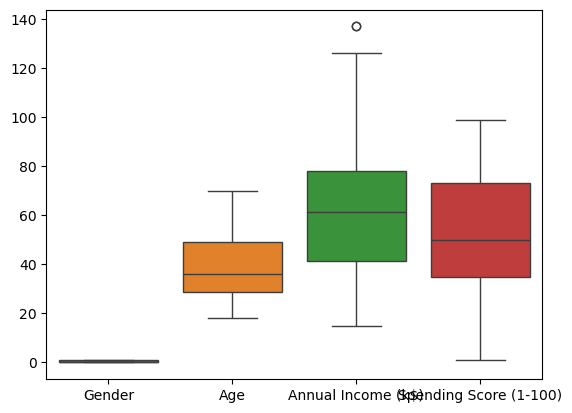

In [15]:
#no dupes
#checking for outliers using boxplot
sns.boxplot(mold)

In [16]:
#looks good, except that one "Annual Income (k$)" column value at around 140, but it seems reasonable

In [17]:
#now applying K-means

In [18]:
#selecting the columns for clustering
molx = mold[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

In [19]:
#view result
print(molx)

[[  1  19  15  39]
 [  1  21  15  81]
 [  0  20  16   6]
 [  0  23  16  77]
 [  0  31  17  40]
 [  0  22  17  76]
 [  0  35  18   6]
 [  0  23  18  94]
 [  1  64  19   3]
 [  0  30  19  72]
 [  1  67  19  14]
 [  0  35  19  99]
 [  0  58  20  15]
 [  0  24  20  77]
 [  1  37  20  13]
 [  1  22  20  79]
 [  0  35  21  35]
 [  1  20  21  66]
 [  1  52  23  29]
 [  0  35  23  98]
 [  1  35  24  35]
 [  1  25  24  73]
 [  0  46  25   5]
 [  1  31  25  73]
 [  0  54  28  14]
 [  1  29  28  82]
 [  0  45  28  32]
 [  1  35  28  61]
 [  0  40  29  31]
 [  0  23  29  87]
 [  1  60  30   4]
 [  0  21  30  73]
 [  1  53  33   4]
 [  1  18  33  92]
 [  0  49  33  14]
 [  0  21  33  81]
 [  0  42  34  17]
 [  0  30  34  73]
 [  0  36  37  26]
 [  0  20  37  75]
 [  0  65  38  35]
 [  1  24  38  92]
 [  1  48  39  36]
 [  0  31  39  61]
 [  0  49  39  28]
 [  0  24  39  65]
 [  0  50  40  55]
 [  0  27  40  47]
 [  0  29  40  42]
 [  0  31  40  42]
 [  0  49  42  52]
 [  1  33  42  60]
 [  0  31  4

In [20]:
#standardize the features, cuz they are on diff scales
scaler = StandardScaler()
molx_scaled = scaler.fit_transform(molx)
#view result
print(molx_scaled)

[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [-0.88640526 -1.20926872 -1.66266033  1.00159627]
 [-0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [-0.88640526 -1.13750203 -1.62449091  1.70038436]
 [ 1.12815215  1.80493225 -1.58632148 -1.83237767]
 [-0.88640526 -0.6351352  -1.58632148  0.84631002]
 [ 1.12815215  2.02023231 -1.58632148 -1.4053405 ]
 [-0.88640526 -0.27630176 -1.58632148  1.89449216]
 [-0.88640526  1.37433211 -1.54815205 -1.36651894]
 [-0.88640526 -1.06573534 -1.54815205  1.04041783]
 [ 1.12815215 -0.13276838 -1.54815205 -1.44416206]
 [ 1.12815215 -1.20926872 -1.54815205  1.11806095]
 [-0.88640526 -0.27630176 -1.50998262 -0.59008772]
 [ 1.12815215 -1.3528021  -1.50998262  0.61338066]
 [ 1.12815215  0.94373197 -1.43364376 -0.82301709]
 [-0.88640526 -0.27630176 -1.43

In [21]:
#initialize the K-Means model
molk = KMeans(n_clusters=3, random_state=0)
#where n is the 'K' value, or the number of clusters, assume 3 for now
#fit the model to the data
molk.fit(molx_scaled)

D:\Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [22]:
#get the cluster centers and labels
print("Cluster Centers:\n", molk.cluster_centers_)
print("Labels:", molk.labels_)

Cluster Centers:
 [[ 1.12815215  0.74307816  0.06431159 -0.79449512]
 [ 0.03792108 -0.77529133  0.04688104  0.88056434]
 [-0.88640526  0.44680201 -0.10812358 -0.5442077 ]]
Labels: [1 1 2 1 2 1 2 1 0 1 0 1 2 1 0 1 2 1 0 1 0 1 2 1 2 1 2 1 2 1 0 1 0 1 2 1 2
 1 2 1 2 1 0 1 2 1 2 2 2 2 2 1 2 0 2 0 2 0 1 0 0 1 2 2 0 1 2 2 1 2 0 2 2 2
 0 1 2 0 1 2 0 0 0 2 1 0 2 1 1 2 2 1 0 2 2 1 2 1 0 1 1 2 0 1 0 1 2 0 0 0 0
 1 2 1 1 1 2 2 2 2 1 2 2 1 2 1 0 1 0 1 0 1 2 1 0 1 2 1 0 1 2 1 2 1 0 1 0 1
 2 1 0 1 2 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 2 1 0 1 0 1 2 1 0 1 0 1 2 1 0 1 2
 1 2 1 2 1 2 1 0 1 2 1 2 1 0 1]


In [23]:
#adding the cluster labels to the dataset
mold['Cluster'] = molk.labels_

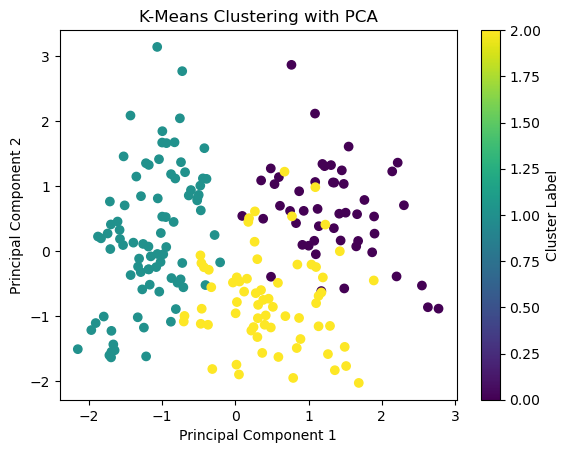

In [46]:
#selecting the two most important features using PCA
pca = PCA(n_components=2)
molx_pca = pca.fit_transform(molx_scaled)
plt.scatter(molx_pca[:, 0], molx_pca[:, 1], c=mold['Cluster'], cmap='viridis')
plt.title("K-Means Clustering with PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')

In [48]:
#Using Elbow Plot to estimate the number of clusters

D:\Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

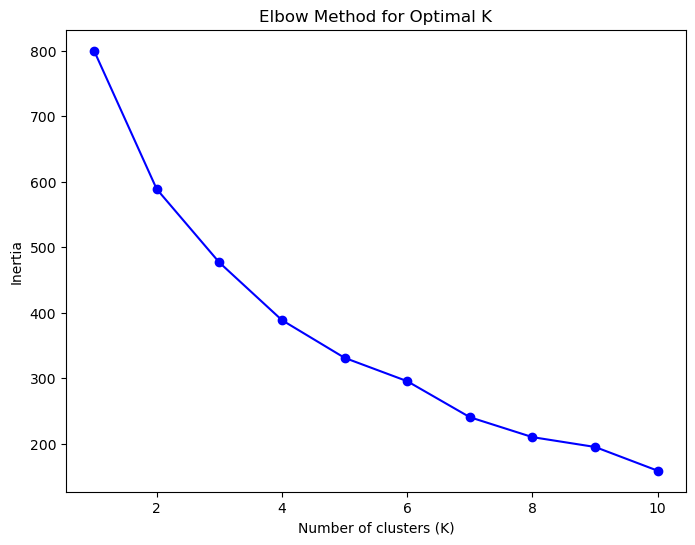

In [52]:
#selecting range of K values to try (up to 10)
K = range(1, 11)
#list to store the inertia values for each K
inertia = []
#compute K-Mean for each K val
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(molx_scaled)
    inertia.append(kmeans.inertia_)
#plot the inertia values against K
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [54]:
#there is a major change at 6, so we select that as K

In [68]:
#K-Means clustering with K = 6 again
#initialize the K-Means model
molke = KMeans(n_clusters=6, random_state=0)
#where n is the 'K' value, or the number of clusters, assume 3 for now
#fit the model to the data
molke.fit(molx_scaled)

D:\Apps\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [70]:
#get the cluster centers and labels
print("Cluster Centers:\n", molke.cluster_centers_)
print("Labels:", molke.labels_)

Cluster Centers:
 [[ 1.12815215  1.43328332 -0.33899906 -0.47223656]
 [-0.88640526 -0.61230035  0.64051772  0.45809442]
 [-0.88640526  0.6801274  -0.25406159 -0.56918381]
 [ 1.12815215 -0.41983513  0.45574298 -0.91591154]
 [ 1.12815215 -0.39989994  1.01344075  1.26040667]
 [ 0.05372153 -0.98679198 -1.21607801  0.85407434]]
Labels: [5 5 2 5 5 5 2 5 0 5 0 5 2 5 3 5 2 5 0 5 3 5 2 5 2 5 2 5 2 5 0 5 0 5 2 5 2
 5 2 5 2 5 0 5 2 5 2 5 2 2 2 5 1 0 2 0 2 0 1 0 0 5 2 2 0 5 2 2 5 1 0 2 2 2
 0 3 2 3 1 2 0 3 0 2 1 0 2 1 1 2 2 3 0 2 1 3 2 1 0 3 1 2 0 3 0 1 2 0 0 0 0
 1 2 3 1 1 2 2 2 2 3 2 1 4 1 1 3 4 0 4 3 4 1 1 3 1 2 4 3 1 2 4 1 1 3 4 3 1
 2 4 3 4 2 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 1 4 3 4 3 4 2 1 0 4 0 4 1 1 3 1 1
 4 2 4 2 1 1 1 3 1 2 1 1 4 3 4]


In [72]:
#adding the cluster labels to the dataset
molde = mold
molde['Cluster'] = molke.labels_

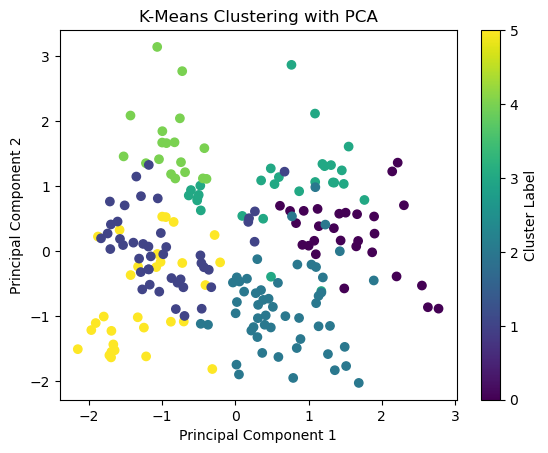

In [78]:
#selecting the two most important features using PCA
molx_pca = pca.fit_transform(molx_scaled)
plt.scatter(molx_pca[:, 0], molx_pca[:, 1], c=molde['Cluster'], cmap='viridis')
plt.title("K-Means Clustering with PCA")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')